In [50]:
# 라이브러리 불러오기
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [51]:
# 실습 데이터 세트 로드 (펭귄 데이터)
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [52]:
# 결측값 확인 
penguins.isnull().sum()

# 결측값 제거
penguins = penguins.dropna(subset=['sex'])        


## 스케일링
- 숫자형 -> 표준화
- 문자형 -> 인코딩 

In [53]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [54]:
#숫자형 데이터 표준화(Standardization)
# bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g   
from sklearn.preprocessing import StandardScaler

#스케일러 정의
scaler = StandardScaler() 

penguins_scaled = penguins.copy() #원본 복사해두기
#표준화할 컬럼만 데이터 프레임화
features = penguins_scaled[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
features_stand = scaler.fit_transform(features)  #표준화

In [55]:
pd.DataFrame(features_stand)

,0,1,2,3
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852
...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957
329,0.514098,-1.457000,1.002739,0.799674
330,1.173384,-0.744994,1.502928,1.919069
331,0.221082,-1.202712,0.788372,1.234995


In [56]:
# 표준화된 데이터 넣어주기
penguins_scaled = penguins_scaled.assign(bill_length_mm = features_stand[:,0],
                                         bill_depth_mm = features_stand[:,1],
                                         flipper_length_mm = features_stand[:,2],
                                         body_mass_g = features_stand[:,3]    
)

In [57]:
penguins_scaled.head(3) # 확인

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female


<AxesSubplot:ylabel='Count'>

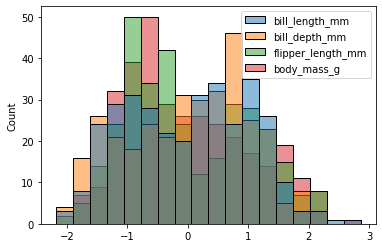

In [58]:
sns.histplot(penguins_scaled)  # 히스토그램으로 그려주기

- 히스토그램이 쌍봉을 이루고 있다

In [59]:
# 문자형 데이터 인코딩 - laber encoding
# species, island, sex
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
penguins_label = penguins_scaled.copy()

features = penguins_label[['species', 'island', 'sex']]

#인코딩 실행
encoded = features.apply(encoder.fit_transform)

In [60]:
encoded.head(3)

,species,island,sex
0,0,2,1
1,0,2,0
2,0,2,0


In [61]:
encoded['sex'].unique(), penguins['sex'].unique()

(array([1, 0]), array(['Male', 'Female'], dtype=object))

In [62]:
encoded.head(3)

,species,island,sex
0,0,2,1
1,0,2,0
2,0,2,0


|기존값|인코딩한값|
|--|--|
|Adelie|0|
|Chinstrap|1|
|Gentoo|2|
|--|--|
|Biscoe|0|
|Dream|1|
|Torgersen|2|
|--|--|
|Female|0|
|Male|1|

In [63]:
# 인코딩한 결과 기존 데이터프레임에 넣어주기
penguins_label = penguins_label.assign(species = encoded['species'],
                                      island= encoded['island'], 
                                      sex = encoded['sex'] )
penguins_label.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.896042,0.780732,-1.426752,-0.568475,1
1,0,2,-0.822788,0.119584,-1.069474,-0.506286,0
2,0,2,-0.676280,0.424729,-0.426373,-1.190361,0


C:\Users\wjd98\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


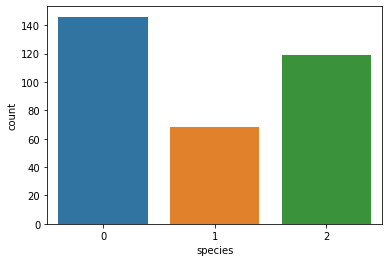

In [64]:
sns.countplot(penguins_label['species'])
plt.show()

## 테스트데이터만들기

In [65]:
from sklearn.model_selection import train_test_split

# 성별 예측하기
X = penguins_label.drop('sex',axis=1) # X: 예측할 변수를 제외한 데이터
Y = penguins_label['sex']    #Y: 예측할 변수

# 학습 테스트 세트 분할
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, shuffle=True)


In [66]:
Y_train

321    1
323    1
279    1
139    1
225    0
      ..
125    1
144    0
181    1
18     0
147    0
Name: sex, Length: 266, dtype: int32

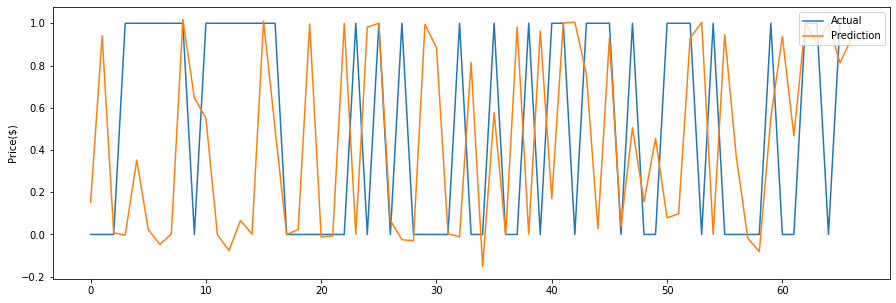

In [67]:
# 예측 결과 시각화
Y_test = Y_test.reset_index(drop=True)

plt.figure(figsize=(15, 5))
plt.plot(Y_test, label='Actual')
plt.plot(predictions, label='Prediction')
plt.legend(loc='upper right')
plt.ylabel('Price($)')
plt.show()

# 모델링하기
**MAE**: 가장 직관적으로 오차알기(낮을수록 좋음)\

**MSE**:  너무 못맞춘 예측값이 많을 수록 기하급수적으로 오차가 커짐\

**RMSE**: MSE 에 루트(root)를 씌운 지표로, MSE 수치 보다 좀더 직관적으로 확인(낮을수록 좋음)\

**R2**: 회귀선이 실제 값에 얼마나 잘 적합되었는가(높을 수록 적합이 잘 되었다는 의미)\

**Radj2**: 과적합 현상을 판단\

** 적합도 (R2) 가 높은데, 수정 된 적합도 (Radj2) 가 현저하게 낮다면, 학습 모델이 과적합 되었다고 판단


## 랜덤포레스트

In [68]:
pip install mean_absolute_error

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mean_absolute_error (from versions: none)
ERROR: No matching distribution found for mean_absolute_error


In [69]:
from sklearn.model_selection import train_test_split    # 라이브러리 로딩
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [70]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()    #모델정의
rf_model.fit(X_train, Y_train)      # 모델학습

predictions = rf_model.predict(X_test)

mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = mse **0.5
r2 = r2_score(Y_test, predictions)
adj_r2 = 1- (1-r2) * (len(Y_test)-1)/ (len(Y_test) - X_test.shape[1]-1 )



print("MAE: {}".format(round(mae, 2)))
print("MSE: {}".format(round(mse, 2)))
print("RMSE: {}".format(round(rmse), 2))
print("R2: {}".format(round(r2, 2)))
print("adj_R2: {}".format(round(adj_r2, 2)))

MAE: 0.14
MSE: 0.07
RMSE: 0
R2: 0.71
adj_R2: 0.69


## XGBoost

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

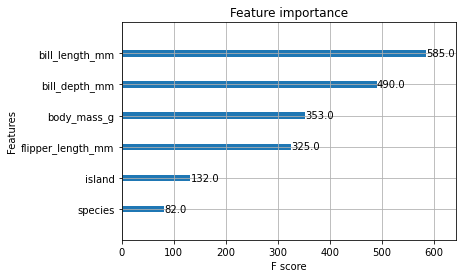

In [71]:
from xgboost import XGBRegressor
from xgboost import plot_importance

xgb_model = XGBRegressor()
xgb_model.fit(X_train, Y_train)

plot_importance(xgb_model)

In [72]:
predictions = xgb_model.predict(X_test)

mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(Y_test, predictions)
adj_r2 = 1 - ( 1-r2) * ( len(Y_test)-1)/ ( len(Y_test)- X_test.shape[1]-1)

print("MAE: {}".format(round(mae, 2)))
print("MSE: {}".format(round(mse, 2)))
print("RMSE: {}".format(round(rmse), 2))
print("R2: {}".format(round(r2, 2)))
print("adj_R2: {}".format(round(adj_r2, 2)))

MAE: 0.13
MSE: 0.07
RMSE: 0
R2: 0.71
adj_R2: 0.68


## lightgbm

In [75]:
# 라이브러리 로딩
from lightgbm import LGBMRegressor  # 분류 문제 : LGBMClassifier

# 모델 정의 / 학습
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, Y_train)

# 예측 결과 확인
predictions = lgbm_model.predict(X_test)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(Y_test, predictions)
adj_r2 = 1 - ( 1 - r2 ) * ( len(Y_test) - 1 ) / ( len(Y_test) - X_test.shape[1] - 1 )

print("MAE: {}".format(round(mae, 2)))
print("MSE: {}".format(round(mse, 2)))
print("RMSE: {}".format(round(rmse), 2))
print("R2: {}".format(round(r2, 2)))
print("adj_R2: {}".format(round(adj_r2, 2)))

MAE: 0.17
MSE: 0.07
RMSE: 0
R2: 0.72
adj_R2: 0.69
